In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

## Set up plotting

In [3]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== AFRISENTI DATASET EXPLORATION ===")

=== AFRISENTI DATASET EXPLORATION ===


## Load All Datasets


In [5]:
def load_afrisenti_data():
    """Load all AfriSenti datasets"""
    data = {}
    
    # Languages and splits
    languages = ['twi', 'hausa']
    splits = ['train', 'dev', 'test']
    
    for lang in languages:
        data[lang] = {}
        for split in splits:
            file_path = f'../data/raw/{lang}_{split}.tsv'
            try:
                df = pd.read_csv(file_path, sep='\t')
                data[lang][split] = df
                print(f"Loaded {lang} {split}: {df.shape[0]} samples")
            except FileNotFoundError:
                print(f"File not found: {file_path}")
    
    return data

In [6]:
# Load data
data = load_afrisenti_data()

Loaded twi train: 3481 samples
Loaded twi dev: 388 samples
Loaded twi test: 949 samples
Loaded hausa train: 14172 samples
Loaded hausa dev: 2677 samples
Loaded hausa test: 5303 samples


## EXPLORING DATA STRUCTURE


In [8]:
print("\n=== DATA STRUCTURE EXPLORATION ===")
for lang in ['twi', 'hausa']:
    if lang in data and 'train' in data[lang]:
        df = data[lang]['train']
        print(f"\n{lang.upper()} columns: {list(df.columns)}")
        print(f"Sample data:")
        print(df.head(3))


=== DATA STRUCTURE EXPLORATION ===

TWI columns: ['ID', 'tweet', 'label']
Sample data:
                ID                                              tweet  \
0  twi_train_00001                        kako be shark but wo ti ewu   
1  twi_train_00002            br ne bayie nti na me supporti man city   
2  twi_train_00003  s3 woofis3 mada wafutuo tantan no 3y3wo s3mafa...   

      label  
0  negative  
1  negative  
2  negative  

HAUSA columns: ['ID', 'tweet', 'label']
Sample data:
               ID                                              tweet     label
0  ha_train_00001  @user Da kudin da Arewa babu wani abin azo aga...  negative
1  ha_train_00002  @user Kaga wani Adu ar Banda💔😭 wai a haka Shi ...  negative
2  ha_train_00003  @user Sai haquri fa yan madrid daman kunce cha...  negative


In [9]:
print("\n=== LABEL DISTRIBUTION ANALYSIS ===")
def analyze_labels(data):
    """Analyze label distributions across languages and splits"""
    results = {}
    
    for lang in ['twi', 'hausa']:
        if lang not in data:
            continue
            
        results[lang] = {}
        total_samples = 0
        
        print(f"\n--- {lang.upper()} ---")
        
        for split in ['train', 'dev', 'test']:
            if split in data[lang]:
                df = data[lang][split]
                # Find label column (might be 'label', 'sentiment', etc.)
                label_col = None
                for col in ['label', 'sentiment', 'target']:
                    if col in df.columns:
                        label_col = col
                        break
                
                if label_col:
                    label_dist = df[label_col].value_counts()
                    results[lang][split] = label_dist
                    total_samples += len(df)
                    
                    print(f"{split}: {len(df)} samples")
                    for label, count in label_dist.items():
                        print(f"  {label}: {count} ({count/len(df)*100:.1f}%)")
        
        print(f"Total {lang} samples: {total_samples}")


=== LABEL DISTRIBUTION ANALYSIS ===


In [10]:
label_results = analyze_labels(data)


--- TWI ---
train: 3481 samples
  positive: 1644 (47.2%)
  negative: 1315 (37.8%)
  neutral: 522 (15.0%)
dev: 388 samples
  positive: 183 (47.2%)
  negative: 147 (37.9%)
  neutral: 58 (14.9%)
test: 949 samples
  positive: 450 (47.4%)
  negative: 353 (37.2%)
  neutral: 146 (15.4%)
Total twi samples: 4818

--- HAUSA ---
train: 14172 samples
  neutral: 4912 (34.7%)
  positive: 4687 (33.1%)
  negative: 4573 (32.3%)
dev: 2677 samples
  neutral: 896 (33.5%)
  negative: 894 (33.4%)
  positive: 887 (33.1%)
test: 5303 samples
  neutral: 1789 (33.7%)
  negative: 1759 (33.2%)
  positive: 1755 (33.1%)
Total hausa samples: 22152


## Visualize label distributions

TypeError: argument of type 'NoneType' is not iterable

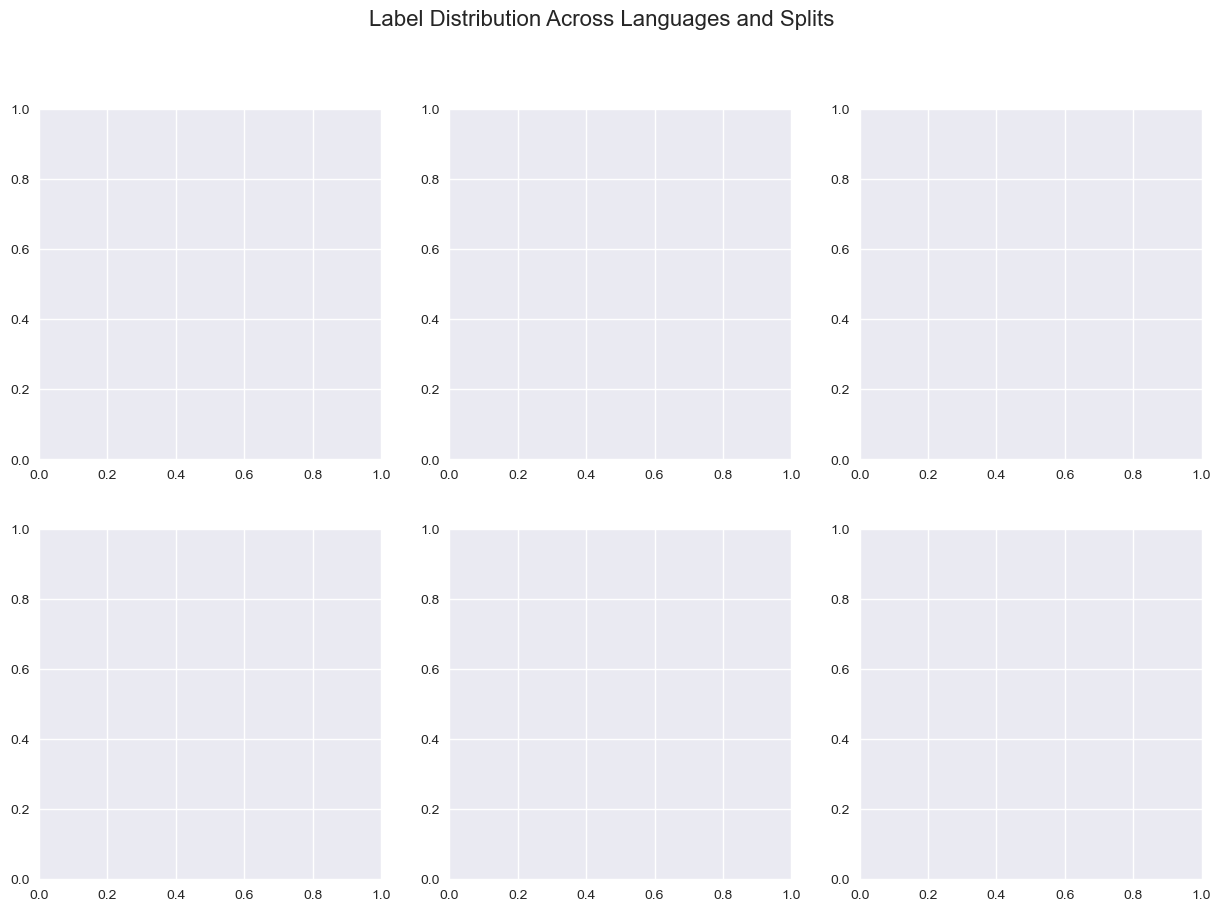

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Label Distribution Across Languages and Splits', fontsize=16)

row_idx = 0
for lang in ['twi', 'hausa']:
    if lang in label_results:
        col_idx = 0
        for split in ['train', 'dev', 'test']:
            if split in label_results[lang]:
                ax = axes[row_idx, col_idx]
                label_dist = label_results[lang][split]
                
                # Create bar plot
                bars = ax.bar(label_dist.index, label_dist.values)
                ax.set_title(f'{lang.capitalize()} {split.capitalize()}')
                ax.set_ylabel('Count')
                
                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height)}', ha='center', va='bottom')
                
                col_idx += 1
        row_idx += 1

plt.tight_layout()
plt.show()

In [ ]:
# Sample text inspection
print("\n=== SAMPLE TEXTS ===")
for lang in ['twi', 'hausa']:
    if lang in data and 'train' in data[lang]:
        df = data[lang]['train']
        text_col = None
        label_col = None
        
        # Find text and label columns
        for col in ['text', 'tweet', 'content']:
            if col in df.columns:
                text_col = col
                break
        for col in ['label', 'sentiment', 'target']:
            if col in df.columns:
                label_col = col
                break
        
        if text_col and label_col:
            print(f"\n{lang.upper()} samples:")
            for sentiment in df[label_col].unique()[:3]:
                sample = df[df[label_col] == sentiment].iloc[0]
                print(f"  {sentiment}: {sample[text_col][:100]}...")